In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
def showdata(X_train,index):
    plt.figure(figsize=(0.9,2))
    plt.imshow(X_train[index])

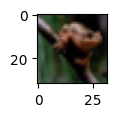

In [5]:
showdata(X_train,5000)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [26]:
cnn_model=models.Sequential([
    layers.Conv2D(filters=10,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),

    layers.Dense(10,activation='softmax')
])

In [27]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [16]:
y_train=y_train.reshape(-1,)

In [28]:
cnn_model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6384 - accuracy: 0.4067
Epoch 2/20
1563/1563 [==============================] - 27s 18ms/step - loss: 1.3481 - accuracy: 0.5189
Epoch 3/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2545 - accuracy: 0.5585
Epoch 4/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2009 - accuracy: 0.5780
Epoch 5/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1636 - accuracy: 0.5918
Epoch 6/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1317 - accuracy: 0.6042
Epoch 7/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1076 - accuracy: 0.6128
Epoch 8/20
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0822 - accuracy: 0.6216
Epoch 9/20
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0607 - accuracy: 0.6268
Epoch 10/20
1563/1563 [==============================] - 24s 15m

In [18]:
import joblib

In [30]:
joblib.dump(cnn_model,'cnn_model.joblib')

['cnn_model.joblib']

In [21]:
import numpy as np

In [29]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.1813 - accuracy: 0.6011


[1.181265115737915, 0.6011000275611877]

IndexError: invalid index to scalar variable.